In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline

In [2]:
# Load the data
train = pd.read_csv('train.csv')
colors = pd.read_csv('color_labels.csv')
breeds = pd.read_csv('breed_labels.csv').drop('Type', axis=1)
states = pd.read_csv('state_labels.csv')

## Data preparation 

### 1) Merge the train data with color, breed and state labels

In [25]:
train_exp = train.copy()

In [26]:
# Add Color labels by matching Color ID
train_exp = train.merge(colors, how='left', left_on='Color1', right_on='ColorID')\
                 .rename(columns={'ColorName' : 'ColorName1'})\
                 .drop(['Color1', 'ColorID'], axis=1)\
                 .merge(colors, how='left', left_on='Color2', right_on='ColorID')\
                 .rename(columns={'ColorName' : 'ColorName2'})\
                 .drop(['Color2', 'ColorID'], axis=1)\
                 .merge(colors, how='left', left_on='Color3', right_on='ColorID')\
                 .rename(columns={'ColorName' : 'ColorName3'})\
                 .drop(['Color3', 'ColorID'], axis=1)        

In [27]:
# Add Breed labels by matching Breed ID
train_exp = train_exp.merge(breeds, how='left', left_on='Breed1', right_on='BreedID')\
                     .rename(columns={'BreedName' : 'BreedName1'})\
                     .drop(['Breed1', 'BreedID'], axis=1)\
                     .merge(breeds, how='left', left_on='Breed2', right_on='BreedID')\
                     .rename(columns={'BreedName' : 'BreedName2'})\
                     .drop(['Breed2', 'BreedID'], axis=1)

In [28]:
# Add State labels by matching State ID
train_exp = train_exp.merge(states, how='left', left_on='State', right_on='StateID')\
                     .drop(['State', 'StateID'], axis=1)

### 2) Incorporate image metadata 

In [8]:
#json.loads(open('train_metadata/0a0e8c15b-1.json').read())

In [29]:
# Define function to load data in json format by matching Pet ID with file name
def load_json(PetID):
    
    try:
        metadata = json.loads(open('train_metadata/' + PetID + '-1.json').read())
    except:
        metadata = None
    
    return metadata

In [30]:
# Add new column with raw metadata
train_exp['metadata'] = train_exp['PetID'].apply(lambda ID: load_json(ID))

In [31]:
# Define functions to extract image description keywords, average score and topicality
def pull_description(json):
    try:
        l = list(set(" ".join([dic['description'] for dic in json['labelAnnotations']]).split(" ")))
    except:
        l = None         
    return l

def pull_score(json):
    try:
        l = np.mean([dic['score'] for dic in json['labelAnnotations']])
    except:
        l = None
    return l

def pull_topicality(json):
    try:
        l = np.mean([dic['topicality'] for dic in json['labelAnnotations']])
    except:
        l = None
    return l

In [32]:
# Add new columns with image description keywords, average score and topicality
train_exp['metadata_description'] = train_exp['metadata'].apply(lambda json: pull_description(json))
train_exp['metadata_score'] = train_exp['metadata'].apply(lambda json: pull_score(json))
train_exp['metadata_topicality'] = train_exp['metadata'].apply(lambda json: pull_topicality(json))

In [33]:
train_exp

,Type,Name,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,...,ColorName1,ColorName2,ColorName3,BreedName1,BreedName2,StateName,metadata,metadata_description,metadata_score,metadata_topicality
0,2,Nibble,3,1,1,1,2,2,2,1,...,Black,White,NaN,Tabby,NaN,Selangor,"{'labelAnnotations': [{'mid': '/m/01yrx', 'des...","[kitten, korat, whiskers, like, bombay, domest...",0.830798,0.830798
1,2,No Name Yet,1,1,2,2,3,3,3,1,...,Black,Brown,NaN,Domestic Medium Hair,NaN,Kuala Lumpur,"{'labelAnnotations': [{'mid': '/m/01yrx', 'des...","[snout, long, fauna, fur, breed, group, like, ...",0.803185,0.803185
2,1,Brisco,1,1,2,2,1,1,2,1,...,Brown,White,NaN,Mixed Breed,NaN,Selangor,"{'labelAnnotations': [{'mid': '/m/0bt9lr', 'de...","[carnivoran, snout, miniature, fox, jack, bree...",0.787158,0.787158
3,1,Miko,4,2,2,1,1,1,2,1,...,Black,Brown,NaN,Mixed Breed,NaN,Kuala Lumpur,"{'labelAnnotations': [{'mid': '/m/0bt9lr', 'de...","[snout, carnivoran, puppy, breed, sporting, li...",0.759658,0.759658
4,1,Hunter,1,1,2,1,2,2,2,1,...,Black,NaN,NaN,Mixed Breed,NaN,Selangor,"{'labelAnnotations': [{'mid': '/m/0bt9lr', 'de...","[companion, snout, labrador, carnivoran, puppy...",0.848929,0.848929
5,2,NaN,3,2,2,1,2,2,2,1,...,Cream,Gray,NaN,Domestic Short Hair,NaN,Selangor,"{'labelAnnotations': [{'mid': '/m/01yrx', 'des...","[blue, fauna, russian, korat, like, domestic, ...",0.879318,0.879318
6,2,BULAT,12,1,2,3,2,2,3,1,...,Black,NaN,NaN,Domestic Long Hair,Domestic Long Hair,Selangor,"{'labelAnnotations': [{'mid': '/m/01yrx', 'des...","[long, european, nebelung, like, domestic, hai...",0.819219,0.819219
7,1,Siu Pak & Her 6 Puppies,0,2,2,1,2,2,2,1,...,Black,Brown,White,Mixed Breed,NaN,Selangor,"{'labelAnnotations': [{'mid': '/m/01z5f', 'des...","[carnivoran, snout, puppy, breed, sporting, li...",0.787823,0.787823
8,2,NaN,2,2,2,2,2,2,2,1,...,Gray,NaN,NaN,Domestic Medium Hair,NaN,Selangor,"{'labelAnnotations': [{'mid': '/m/01yrx', 'des...","[snout, kitten, european, fauna, like, domesti...",0.785273,0.785273
9,2,Kitty,12,2,2,2,3,3,3,1,...,Black,White,NaN,Domestic Medium Hair,NaN,Selangor,"{'labelAnnotations': [{'mid': '/m/01yrx', 'des...","[tail, snout, kitten, fur, like, domestic, hai...",0.799781,0.799781


### 3) Divide pets into pure and mixed breed

In [37]:
train_exp['BreedName1'].value_counts()

Mixed Breed                     5927
Domestic Short Hair             3634
Domestic Medium Hair            1258
Tabby                            342
Domestic Long Hair               296
Siamese                          264
Persian                          221
Labrador Retriever               205
Shih Tzu                         190
Poodle                           167
Terrier                          162
Golden Retriever                 151
Calico                           105
German Shepherd Dog               98
American Shorthair                94
Beagle                            90
Spitz                             89
Rottweiler                        88
Oriental Short Hair               73
Bengal                            71
Schnauzer                         69
Miniature Pinscher                67
Jack Russell Terrier              64
Doberman Pinscher                 62
Tuxedo                            56
Tortoiseshell                     42
Cocker Spaniel                    41
D

In [81]:
# Fill missing values with 0
train_exp['BreedName2'].fillna(value=0, inplace=True)

In [82]:
def breed_type(breed1, breed2):
    mixed_breeds = ['Mixed Breed', 'Domestic Short Hair', 'Domestic Medium Hair', 'Domestic Long Hair', 'Tabby']
    if breed1 not in mixed_breeds and breed2 == 0:
        breed_type = 'Pure'  
    else:
        breed_type = 'Mixed'
    return breed_type

In [83]:
# Create column with breed types
train_exp['breed_type'] = train_exp.apply(lambda row: breed_type(row['BreedName1'], row['BreedName2']),
                                          axis=1)

In [87]:
train_exp['breed_type'].value_counts()

Mixed    13233
Pure      1760
Name: breed_type, dtype: int64

In [85]:
# Test
train_exp[['breed_type', 'BreedName1', 'BreedName2']]

,breed_type,BreedName1,BreedName2
0,Mixed,Tabby,0
1,Mixed,Domestic Medium Hair,0
2,Mixed,Mixed Breed,0
3,Mixed,Mixed Breed,0
4,Mixed,Mixed Breed,0
5,Mixed,Domestic Short Hair,0
6,Mixed,Domestic Long Hair,Domestic Long Hair
7,Mixed,Mixed Breed,0
8,Mixed,Domestic Medium Hair,0
9,Mixed,Domestic Medium Hair,0


In [91]:
train_exp.describe()

,Type,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,metadata_score,metadata_topicality
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14650.000000,14650.000000
mean,1.457614,10.452078,1.776162,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,0.056760,3.889215,2.516441,0.783802,0.783802
std,0.498217,18.155790,0.681592,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,0.346185,3.487810,1.177265,0.045051,0.045051
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.517198,0.517198
25%,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.754000,0.754000
50%,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,0.781212,0.781212
75%,2.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,0.812278,0.812278
max,2.000000,255.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,8.000000,30.000000,4.000000,0.953746,0.953746


### 4) Remove outliers and missing values

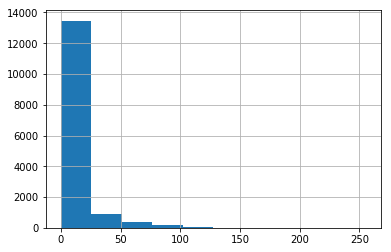

In [96]:
train_exp['Age'].hist()

In [100]:
mean = np.mean(train_exp['Age'])
std = np.std(train_exp['Age'])
print('Mean: {}  StDev:  {}'.format(round(mean),round(std)))

Mean: 10  StDev:  18


In [103]:
# Remove observations where Age is above 2 standard deviations
train_clean = train_exp.drop(train_exp[train_exp['Age']>(mean+2*std)].index)

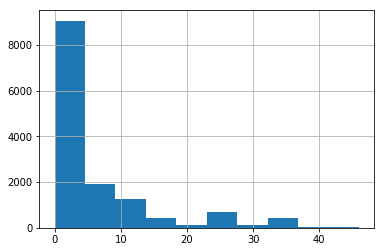

In [104]:
train_clean['Age'].hist()

In [106]:
train_clean.shape

(14100, 29)

In [175]:
# Remove missing values
train_clean = train_clean.dropna(axis=0, subset=['metadata_description', 'metadata_score', 'metadata_topicality'])

In [176]:
train_clean.isnull().sum()

Age                             0
Quantity                        0
Fee                             0
Description                    10
PhotoAmt                        0
AdoptionSpeed                   0
ColorName2                   4001
ColorName3                   9709
BreedName1                      3
BreedName2                      0
metadata_description            0
metadata_score                  0
metadata_topicality             0
Type_2                          0
Gender_2                        0
Gender_3                        0
MaturitySize_2                  0
MaturitySize_3                  0
MaturitySize_4                  0
FurLength_2                     0
FurLength_3                     0
Vaccinated_2                    0
Vaccinated_3                    0
Dewormed_2                      0
Dewormed_3                      0
Sterilized_2                    0
Sterilized_3                    0
Health_2                        0
Health_3                        0
ColorName1_Bro

### 5) Obtain dummy variables

In [108]:
train_clean.columns

Index(['Type', 'Name', 'Age', 'Gender', 'MaturitySize', 'FurLength',
       'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee',
       'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt',
       'AdoptionSpeed', 'ColorName1', 'ColorName2', 'ColorName3', 'BreedName1',
       'BreedName2', 'StateName', 'metadata', 'metadata_description',
       'metadata_score', 'metadata_topicality', 'breed_type'],
      dtype='object')

In [107]:
variables_to_dummify = ['Type', 'Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 
                        'Sterilized', 'Health', 'ColorName1', 'StateName', 'breed_type']

In [177]:
train_clean = pd.get_dummies(train_clean, columns=['Type', 'Gender', 'MaturitySize', 'FurLength', 
                                                   'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 
                                                   'ColorName1', 'StateName', 'breed_type'], drop_first=True)
    

KeyError: "['Type' 'Gender' 'MaturitySize' 'FurLength' 'Vaccinated' 'Dewormed'\n 'Sterilized' 'Health' 'ColorName1' 'StateName' 'breed_type'] not in index"

In [113]:
train_clean.drop(columns=['Name', 'RescuerID', 'VideoAmt', 'PetID', 'metadata'], inplace=True)

In [ ]:
train_clean.

# Machine Learning

### 1. Preprocessing

In [178]:
# Select target and independent variables
X = train_clean[['Age', 'Quantity', 'Fee', 'PhotoAmt', 'metadata_score',
       'Type_2', 'Gender_2', 'Gender_3', 'MaturitySize_2', 'MaturitySize_3',
       'MaturitySize_4', 'FurLength_2', 'FurLength_3', 'Vaccinated_2',
       'Vaccinated_3', 'Dewormed_2', 'Dewormed_3', 'Sterilized_2',
       'Sterilized_3', 'Health_2', 'Health_3', 'ColorName1_Brown',
       'ColorName1_Cream', 'ColorName1_Golden', 'ColorName1_Gray',
       'ColorName1_White', 'ColorName1_Yellow', 'StateName_Kedah',
       'StateName_Kelantan', 'StateName_Kuala Lumpur', 'StateName_Labuan',
       'StateName_Melaka', 'StateName_Negeri Sembilan', 'StateName_Pahang',
       'StateName_Perak', 'StateName_Pulau Pinang', 'StateName_Sabah',
       'StateName_Sarawak', 'StateName_Selangor', 'StateName_Terengganu',
       'breed_type_Pure']]
y = train_clean['AdoptionSpeed']

In [179]:
# Split the dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [180]:
# Scaling the inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [167]:
# Variable ranking
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
logreg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
selector = RFECV(logreg, step=1, cv=5)
selector = selector.fit(X, y)

In [168]:
selector.ranking_

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 2. Modelling with Random Forest, Naive Bayes and KNN

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [121]:
rf_clf = RandomForestClassifier()
NB_clf = MultinomialNB()
kn_clf = KNeighborsClassifier()
voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('NB', NB_clf), ('KN', kn_clf)])

In [189]:
from sklearn.metrics import accuracy_score
for clf in (rf_clf, NB_clf, kn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.3471853104614641
MultinomialNB 0.3041797535636627
KNeighborsClassifier 0.33510509784972214
VotingClassifier 0.3500845614882822


### 3. Boosting with AdaBoost and Gradient Boosting

In [200]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=200, 
                             algorithm='SAMME.R', learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

In [201]:
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.37859386325199323


In [203]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt_clf = GradientBoostingClassifier(max_depth=2, n_estimators=200, learning_rate=0.5)
gbrt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [204]:
y_pred = gbrt_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.37593621647741
